<a href="https://colab.research.google.com/github/kokpingli/DrawFractalApp/blob/master/a__search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, position, parent=None):
        self.position = position # (x, y) tuple
        self.parent = parent

        self.g = 0 # Cost from start to current node
        self.h = 0 # Heuristic (estimated cost from current to goal)
        self.f = 0 # Total cost (g * h)

    def __lt__(self, other):
        return self.f < other.f

    def __eq__(self, other):
        return self.position == other.position

def manhattan_distance(pos1, pos2):
    """Manhattan distance heuristic"""
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def astar_search(grid, start, end):
    """A* search algorithm implementation"""
    # Create start and end nodes
    start_node = Node(start)
    end_node = Node(end)

    # Initialize open and closed list
    open_list = []
    closed_list = []

    # Add the start node to open list
    heapq.heappush(open_list, start_node)

    # Loop until finding the end
    while open_list:
        # Get current node (lowest f value)
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children (4-directional movement)
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            # Get node position
            node_position = (current_node.position[0] + new_position[0],
                             current_node.position[1] + new_position[1])

            # Check if within range
            if (node_position[0] < 0 or node_position[0] >= len(grid) or
                node_position[1] < 0 or node_position[1] >= len(grid[0])):
                continue

            # Check if walkable terrain
            if grid[node_position[0]][node_position[1]] == 1: # 1 represents obstacle
                continue

            # Create new node
            child = Node(node_position, current_node)

            # Skip if node is in closed_list
            if child in closed_list:
                continue

            # Calculate f, g, h values
            child.g = current_node.g + 1
            child.h = manhattan_distance(child.position, end_node.position)
            child.f = child.g + child.h

            # Child is already in open list with a lower g value
            if any(open_node == child and open_node.g <= child.g for open_node in open_list):
                continue

            # Add child to open_list
            heapq.heappush(open_list, child)

    # No path found
    return None

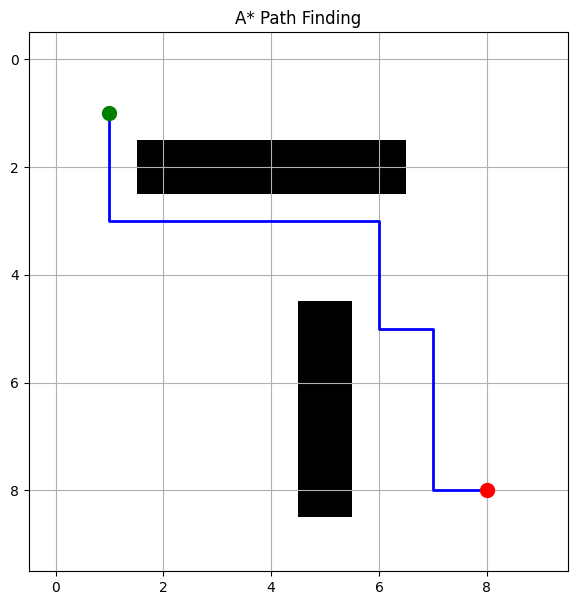

In [4]:
# Create a simple 10x10 grid (0 = free, 1 = obstacle)
grid = np.zeros((10, 10))

# Add some obstacles
obstacles = [(2,2), (2,3), (2,4), (2,5), (2,6),
             (5,5), (6,5), (7,5), (8,5)]
for obs in obstacles:
    grid[obs] = 1

# Set start and end points
start = (1, 1)
end = (8, 8)

# Find path
path = astar_search(grid, start, end)

# Visualize
def visualize_path(grid, path, start, end):
    plt.figure(figsize=(7, 7))
    plt.imshow(grid, cmap='binary')

    # Plot path
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, 'b-', linewidth=2)

    # Plot start and end
    plt.plot(start[1], start[0], 'go', markersize=10)
    plt.plot(end[1], end[0], 'ro', markersize=10)

    plt.grid()
    plt.title('A* Path Finding')
    plt.show()

visualize_path(grid, path, start, end)